<a href="https://colab.research.google.com/github/DiploDatos/AnalisisyVisualizacion/blob/master/Entregable_Parte_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


**Diplomatura en Ciencia de Datos, Aprendizaje Automático y sus Aplicaciones**

**Edición 2021**

---
## Trabajo práctico entregable - Parte 1

In [1]:
import io
import matplotlib
import matplotlib.pyplot as plt
import numpy
import pandas as pd
import seaborn

seaborn.set_context('talk')

## Lectura del dataset

En la notebook 00 se explican los detalles de la siguiente sección.

In [2]:
url = 'https://cs.famaf.unc.edu.ar/~mteruel/datasets/diplodatos/sysarmy_survey_2020_processed.csv'
df = pd.read_csv(url)

In [3]:
df[:3]

,profile_gender,profile_age,work_country,work_province,profile_years_experience,work_years_in_company,work_years_in_current_position,work_people_in_charge_of,profile_studies_level,profile_studies_level_state,...,work_has_violence_situations,profile_sexual_orientation,profile_has_disabilities,profile_has_disabilities_hiring_difficulties,company_employee_number,company_main_activity,company_recommended,company_diversity_policies,company_extra_benefits,company_best_companies_city
0,Mujer,26,Argentina,Ciudad Autónoma de Buenos Aires,3.0,3.0,3.0,0,Universitario,En curso,...,En mi trabajo actual,Homosexual,NaN,NaN,501-1000,Servicios / Consultoría de Software / Digital,7,2,"Capacitaciones y/o cursos, Comidas pagas / sub...",NaN
1,Hombre,29,Argentina,Corrientes,5.0,2.0,2.0,4,Universitario,En curso,...,Jamás,Heterosexual,Visual,No,201-500,Otras industrias,8,9,"Horarios flexibles, Stock options / RSUs, Viát...",NaN
2,Mujer,22,Argentina,Ciudad Autónoma de Buenos Aires,2.0,0.0,0.0,0,Secundario,Completado,...,En un trabajo anterior,Bisexual o queer,NaN,No,2001-5000,Otras industrias,6,9,"Clases de gimnasia online, Comidas pagas / sub...",NaN


# Ejercicio 1 - Análisis descriptivo

Responder a la pregunta: **¿Cuáles son los lenguajes de programación asociados a los mejores salarios?**

Para ello:
1. Seleccionar las columnas relevantes para analizar.
2. Seleccionar las filas relevantes para analizar. Esto incluye la eliminación de valores extremos y erróneos, pero también puede enfocar el análisis en una sub-población. Por ejemplo, se pueden limitar a personas con un salario mayor que 10000 pesos, o a las personas que trabajan sólo en "Data Science", pero deben justificar su elección y reformular la pregunta inicial de ser necesario.
  * Obtener una lista de los lenguajes de programación más populares. Decidir cuántos y cuáles seleccionan para incluir en el análisis.
  * Para cada una de las otras columnas del punto anterior, elegir los rangos o valores seleccionan para incluir en el análisis.
3. Seleccionar métricas que ayuden a responder la pregunta, y los métodos para analizarlas. Elegir UNA de las siguientes opciones:
  * Comparar las distribuciones de salario para cada lenguaje utilizando visualizaciones. Como la visualización es el producto final, debe ser clara y mostrar información relevante.
  * Comparar medidas de estadística descriptiva sobre la distribución de salario para cada lenguaje. Sean creativos, la estadística descriptiva nos permite decir cosas como: "el 10% de los mejores sueldos los ganan, en su mayoría, programadores que saben kotlin!" (donde *mayoría* es un término medio engañoso que sólo significa más del 50%). Para comparar múltiples lenguajes, les recomendamos usar también visualizaciones.
  * Comparar probabilidades. Por ejemplo: "Si sabés Python o Java, tenés un 30% más de chances de ganar arriba de 100K".

Si lo consideran necesario, realicen varias iteraciones. Es decir, si encuentran que las distribuciones de los lenguajes de programación que seleccionaron inicialmente no son muy diferentes, pueden re-hacer el análisis usando sólo los lenguajes de programación que son diferentes.

In [4]:
# complete here if you want to include more columns
relevant_columns = ['tools_programming_languages', 'salary_monthly_NETO']

### Conteo de frecuencias de los lenguajes de programación

La columna que contiene información sobre los lenguajes de programación utilizados es `tools_programming_languages`. Sus valores son strings con los lenguajes seleccionados separados por comas.



In [5]:
df.tools_programming_languages[:3]

0                     Ninguno
1    HTML, Javascript, Python
2                     Ninguno
Name: tools_programming_languages, dtype: object

Las siguientes celdas de código separan estos lenguajes de programación y cuentan la frecuencia con la que aparecen.

No es necesario entender este código en profundidad, aunque sí es un buen ejercicio.

In [6]:
# Convert the comma-separated string of languages to a list of string.
# Remove 'ninguno de los anteriores' option, spaces and training commas.
def split_languages(languages_str):
  if not isinstance(languages_str, str):
    return []
  # Remove 'other' option
  languages_str = languages_str.lower()\
    .replace('ninguno de los anteriores', '')
  # Split string into list of items
  # Remove spaces and commas for each item
  return [lang.strip().replace(',', '')
          for lang in languages_str.split()]

# Create a new column with the list of languages
df.loc[:, 'cured_programming_languages'] = df.tools_programming_languages\
    .apply(split_languages)
if 'cured_programming_languages' not in relevant_columns:
    relevant_columns.append('cured_programming_languages') 

# Duplicate each row of df for each programming language
# mentioned in the response.
# We only include in df_lang the columns we are going to analyze later, so we
# don't duplicate innecesary information.
df_lang = df.cured_programming_languages\
    .apply(pd.Series).stack()\
    .reset_index(level=-1, drop=True).to_frame()\
    .join(df[relevant_columns])\
    .rename(columns={0: 'programming_language'})
# Horrible programming style! But a lot of data science code can be written with
# as concatenations of functions (pipelines), and there's no elegant way of
# doing that on Python.
df_lang[:5]

,programming_language,tools_programming_languages,salary_monthly_NETO,cured_programming_languages
0,ninguno,Ninguno,43000.0,[ninguno]
1,html,"HTML, Javascript, Python",63000.0,"[html, javascript, python]"
1,javascript,"HTML, Javascript, Python",63000.0,"[html, javascript, python]"
1,python,"HTML, Javascript, Python",63000.0,"[html, javascript, python]"
2,ninguno,Ninguno,127000.0,[ninguno]


En la columna `programming_language` se encuentra cada lenguaje por separado. Notar que si una respuesta contenía 3 lenguajes, como `"HTML, Javascript, Python"`, la fila ha sido replicada 3 veces. Por ello, hay tres filas con índice 1.

In [7]:
language_count = df_lang.programming_language.value_counts()\
    .reset_index()\
    .rename(columns={'index': 'language', 'programming_language': 'frequency'})
language_count[:15]

,language,frequency
0,javascript,2513
1,sql,2154
2,html,1861
3,python,1475
4,java,1453
5,css,1247
6,bash/shell,993
7,php,891
8,.net,823
9,typescript,779


In [8]:
muestra = language_count.language[:5] # seleccionamos los primeros 5 lenguajes con los que voy a trabajar (los 5 mas usados)
# muestra

df_muestreo = df_lang[df_lang["programming_language"].isin(muestra)] # filtramos en base a nuestra muestra sobre el df_lang
df_muestreo = df_muestreo[["programming_language", "salary_monthly_NETO"]] # le pedimos que nos muestre esas dos columnas.
df_muestreo

# df_lang["programming_language"].isin(muestra)

,programming_language,salary_monthly_NETO
1,html,63000.0
1,javascript,63000.0
1,python,63000.0
3,html,102000.0
3,java,102000.0
...,...,...
6093,html,72.0
6093,java,72.0
6093,javascript,72.0
6093,python,72.0


In [9]:
df_muestreo[df_muestreo["salary_monthly_NETO"].isna()]

,programming_language,salary_monthly_NETO
140,html,NaN
140,javascript,NaN
301,python,NaN
307,html,NaN
307,javascript,NaN
...,...,...
6019,javascript,NaN
6019,sql,NaN
6036,java,NaN
6041,java,NaN


In [10]:
df_muestreo = df_muestreo.dropna()
df_muestreo

,programming_language,salary_monthly_NETO
1,html,63000.0
1,javascript,63000.0
1,python,63000.0
3,html,102000.0
3,java,102000.0
...,...,...
6093,html,72.0
6093,java,72.0
6093,javascript,72.0
6093,python,72.0


In [11]:
df_python = df_muestreo[df_muestreo["programming_language"] == "python"]
df_python.salary_monthly_NETO.mean()

110805.04579110799

In [12]:
promedio_ls = [] # creamos una lista vacia

for language in muestra:
    promedio = df_muestreo[df_muestreo["programming_language"] == language].salary_monthly_NETO.mean().round() # filtro por lenguaje y le pido el prom del salario neto por lenguaje
    tupla = (language, promedio)
    promedio_ls.append(tupla) # agrego las tuplas a la lista.

df_promedio = pd.DataFrame(promedio_ls, columns =['language', 'promedio']) # como crear un df a partir de una lista de tupla
df_promedio

,language,promedio
0,javascript,100350.0
1,sql,92165.0
2,html,91807.0
3,python,110805.0
4,java,99770.0


<AxesSubplot:xlabel='language', ylabel='promedio'>

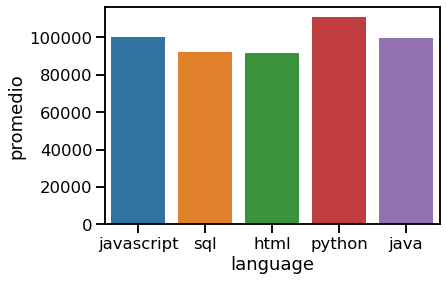

In [13]:
# Draw a set of vertical bar plots grouped by a categorical variable

seaborn.barplot(x="language", y="promedio", data=df_promedio)

In [14]:
df_muestreo.describe().round()

,salary_monthly_NETO
count,9112.0
mean,98330.0
std,99856.0
min,1.0
25%,53784.0
50%,80000.0
75%,110000.0
max,2080000.0


<AxesSubplot:xlabel='salary_monthly_NETO', ylabel='Count'>

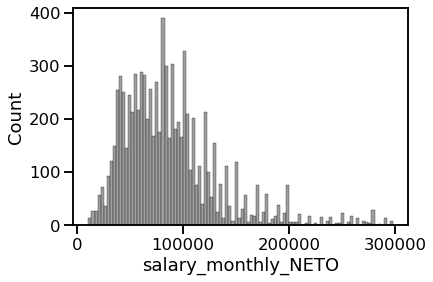

In [15]:
filtered_df = df_muestreo[(df_muestreo["salary_monthly_NETO"] < 300000) & (df_muestreo["salary_monthly_NETO"] > 10000)]
seaborn.histplot(filtered_df["salary_monthly_NETO"], bins=100, color='gray')

In [16]:
# df[salary_col].quantile([.95, .98, .99, .995, .998]) para calcular los cuantiles

In [17]:
filtered_df.describe().round()

,salary_monthly_NETO
count,8503.0
mean,87821.0
std,46510.0
min,10700.0
25%,55000.0
50%,80000.0
75%,106000.0
max,298000.0


In [18]:
filtered_df.head()

,programming_language,salary_monthly_NETO
1,html,63000.0
1,javascript,63000.0
1,python,63000.0
3,html,102000.0
3,java,102000.0


In [19]:
for lang, group in filtered_df.groupby("programming_language"):
    print(lang, group.describe().round())

html        salary_monthly_NETO
count               1662.0
mean               81756.0
std                44780.0
min                12000.0
25%                51000.0
50%                73078.0
75%               100000.0
max               298000.0
java        salary_monthly_NETO
count               1334.0
mean               93916.0
std                47475.0
min                11000.0
25%                60000.0
50%                86861.0
75%               115562.0
max               298000.0
javascript        salary_monthly_NETO
count               2221.0
mean               86974.0
std                47370.0
min                11000.0
25%                53951.0
50%                80000.0
75%               105000.0
max               298000.0
python        salary_monthly_NETO
count               1324.0
mean               96203.0
std                48934.0
min                10700.0
25%                62500.0
50%                88000.0
75%               116250.0
max               290000.0


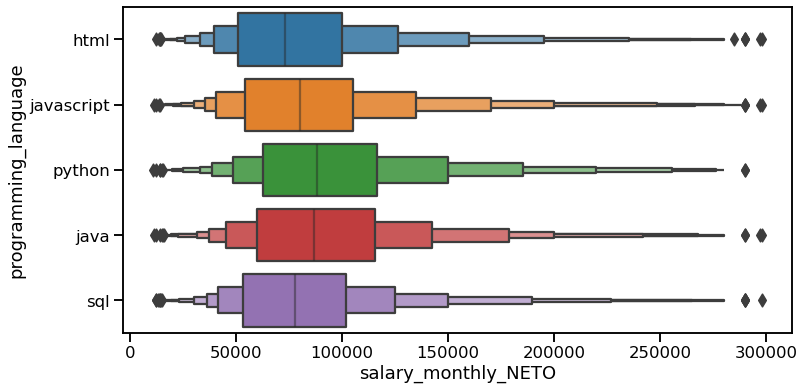

In [20]:
plt.figure(figsize=(12, 6))
seaborn.boxenplot(data=filtered_df, x='salary_monthly_NETO', y='programming_language')
plt.ticklabel_format(style='plain', axis='x') # axis=ejes

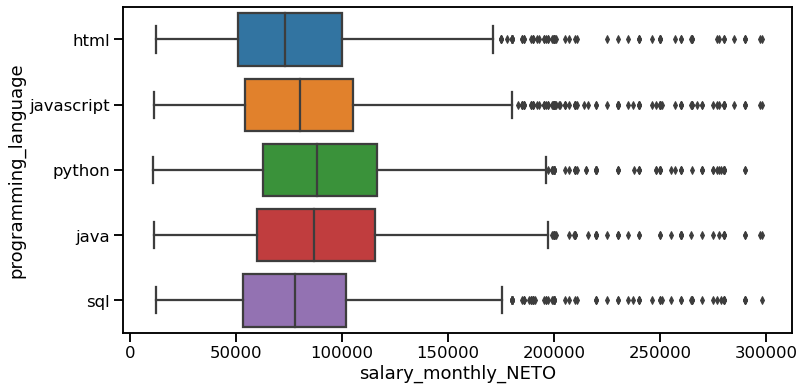

In [21]:
plt.figure(figsize=(12, 6))
seaborn.boxplot(data=filtered_df, x='salary_monthly_NETO', y='programming_language')
plt.ticklabel_format(style='plain', axis='x') # axis=ejes

<AxesSubplot:xlabel='salary_monthly_NETO', ylabel='programming_language'>

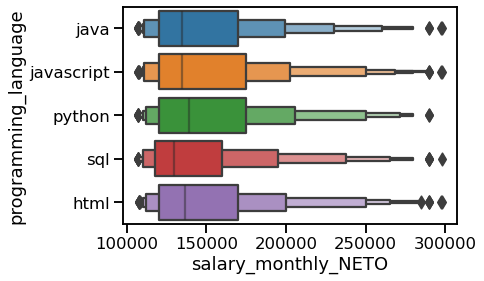

In [22]:
filtered_2_df = filtered_df[(filtered_df["salary_monthly_NETO"] < 300000) & (filtered_df["salary_monthly_NETO"] > 106000)]
seaborn.boxenplot(data=filtered_2_df, x='salary_monthly_NETO', y='programming_language')


# seaborn.histplot(filtered_2_df["salary_monthly_NETO"], bins=100, color='gray')

In [23]:
for lang, group in filtered_2_df.groupby("programming_language"):
    print(lang, group.describe().round())

html        salary_monthly_NETO
count                328.0
mean              152006.0
std                44098.0
min               107500.0
25%               120000.0
50%               136500.0
75%               170000.0
max               298000.0
java        salary_monthly_NETO
count                408.0
mean              149303.0
std                41781.0
min               107000.0
25%               120000.0
50%               134500.0
75%               170000.0
max               298000.0
javascript        salary_monthly_NETO
count                536.0
mean              152552.0
std                44893.0
min               107000.0
25%               120000.0
50%               135000.0
75%               175000.0
max               298000.0
python        salary_monthly_NETO
count                406.0
mean              153265.0
std                44598.0
min               107000.0
25%               120000.0
50%               139250.0
75%               175000.0
max               290000.0


In [24]:
avg_salary = filtered_df["salary_monthly_NETO"].mean().round()
avg_salary

87821.0

In [25]:
p_above_avg = len(filtered_df[filtered_df["salary_monthly_NETO"] >= avg_salary]) / len(filtered_df)
p_above_avg # probabilidad de ganar mas que el promedio.

0.4199694225567447

In [26]:
is_above_avg = filtered_df["salary_monthly_NETO"] > avg_salary
python_exp = filtered_df["programming_language"] == "python"
intersection_count = len(filtered_df[is_above_avg & python_exp])
python_count = len(filtered_df[python_exp])

In [27]:
python_above_avg = intersection_count / python_count
python_above_avg*100 #probabilidad de ganar mas que el promedio si sabes python

50.15105740181269

In [28]:
javascript_exp = filtered_df["programming_language"] == "javascript"
intersection_2_count = len(filtered_df[is_above_avg & javascript_exp])
javascript_count = len(filtered_df[javascript_exp])
javascript_above_avg = intersection_2_count / javascript_count
javascript_above_avg*100 #probabilidad de ganar mas que el promedio si sabes javascript

40.25213867627195

## Filtrado de lenguajes relevantes

El siguiente código permite seleccionar sólo las filas donde el valor de la columna `programming_language` se encuentre en la lista `interesting_languages`.

In [29]:
# Filter out languages that we want to exclude
# Complete here with your selected list.
interesting_languages = ["Python"]
filtered_df_lang = df_lang[df_lang.programming_language.isin(interesting_languages)]
filtered_df_lang[:5]

,programming_language,tools_programming_languages,salary_monthly_NETO,cured_programming_languages


# Ejercicio 2 - Densidades y varias varialbes

Responder a la pregunta general: **¿Que herramientas (prácticas y teóricas) són útiles para explorar la base, descubrir patrones, asociaciones?**

Para ello considere (igual al ejercicio Anterior):
1. Seleccionar las columnas relevantes para analizar.
2. Seleccionar las filas relevantes para analizar. Esto incluye la eliminación de valores extremos y erróneos, pero también puede enfocar el análisis en sub-poblaciones. 

In [33]:
df.head()

,profile_gender,profile_age,work_country,work_province,profile_years_experience,work_years_in_company,work_years_in_current_position,work_people_in_charge_of,profile_studies_level,profile_studies_level_state,...,profile_sexual_orientation,profile_has_disabilities,profile_has_disabilities_hiring_difficulties,company_employee_number,company_main_activity,company_recommended,company_diversity_policies,company_extra_benefits,company_best_companies_city,cured_programming_languages
0,Mujer,26,Argentina,Ciudad Autónoma de Buenos Aires,3.0,3.0,3.0,0,Universitario,En curso,...,Homosexual,NaN,NaN,501-1000,Servicios / Consultoría de Software / Digital,7,2,"Capacitaciones y/o cursos, Comidas pagas / sub...",NaN,[ninguno]
1,Hombre,29,Argentina,Corrientes,5.0,2.0,2.0,4,Universitario,En curso,...,Heterosexual,Visual,No,201-500,Otras industrias,8,9,"Horarios flexibles, Stock options / RSUs, Viát...",NaN,"[html, javascript, python]"
2,Mujer,22,Argentina,Ciudad Autónoma de Buenos Aires,2.0,0.0,0.0,0,Secundario,Completado,...,Bisexual o queer,NaN,No,2001-5000,Otras industrias,6,9,"Clases de gimnasia online, Comidas pagas / sub...",NaN,[ninguno]
3,Hombre,39,Argentina,Corrientes,15.0,15.0,13.0,5,Posgrado,Incompleto,...,Heterosexual,NaN,NaN,501-1000,Otras industrias,7,6,"Abono de celular, Capacitaciones y/o cursos, C...",NaN,"[bash/shell, c, css, html, java, javascript, p..."
4,Hombre,32,Argentina,Ciudad Autónoma de Buenos Aires,9.0,6.0,6.0,0,Universitario,En curso,...,Heterosexual,NaN,NaN,11-50,Servicios / Consultoría de Software / Digital,6,6,"Clases de idiomas, Horarios flexibles, Vacacio...",NaN,"[css, html, javascript, sql, typescript]"


In [36]:
variables_2 = ['profile_studies_level', 'profile_studies_level', 'profile_years_experience', 'salary_monthly_NETO', 'salary_monthly_BRUTO']

df_var_2 = df[variables_2]
df_var_2.head()

,profile_studies_level,profile_studies_level,profile_years_experience,salary_monthly_NETO,salary_monthly_BRUTO
0,Universitario,Universitario,3.0,43000.0,53000.0
1,Universitario,Universitario,5.0,63000.0,79000.0
2,Secundario,Secundario,2.0,127000.0,160000.0
3,Posgrado,Posgrado,15.0,102000.0,130000.0
4,Universitario,Universitario,9.0,106000.0,140000.0


## a) Densidad conjunta

Que herramientas visuales y modelos puede utilizar para estudiar la distribución y comportamiento de sus datos? 

Elija tres variables numéricas y 2 variables categóricas. Visualice la base según varias de las variables elegidas. Puede describir de alguna forma el comportamiento de sus datos? Que herramientas utilizaría? Describa




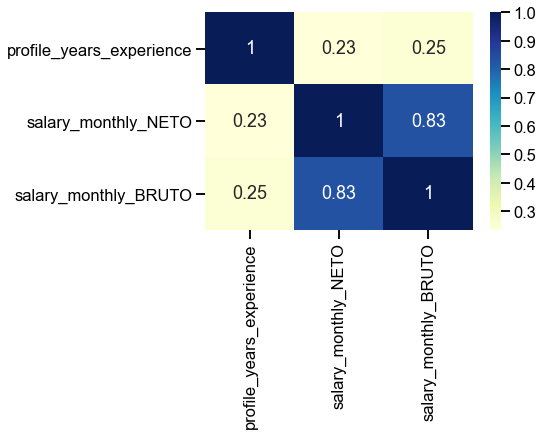

In [40]:
corr = df_var_2.corr()
#.corr es una funcion que correlaciona las variables una con otra y luego la grafico con el heatmap de seaborn
seaborn.heatmap(corr, cmap="YlGnBu", annot = True)
seaborn.set(rc={'figure.figsize':(15,12)})

## b) Asociación

* Necesitamos decidir si sacar o no la columna de salario bruto. Para hacer la encuesta más simple.
¿Existe una correlación entre el salario bruto y el neto? Que abordaje y medidas usaría



## c) Densidad condicional 

Estudie la distribución del salario según el nivel de estudio.

Separe la población según el nivel de estudio (elija dos subpoblaciones numerosas) y grafique de manera comparativa ambos histogramas de la variable `'salary_monthly_NETO'`
¿Considera que ambas variables son independientes?
¿Qué analizaría al respecto?

Calcule medidas de centralización y dispersión para cada subpoblación






## d) Densidad Conjunta condicional

Elija dos variables numéricas y una categórica. 
Estudie la dispersión (scatterplot) de las dos variables discriminando en color por la variable categórica (ayuda: hue en seaborn)
